<a href="https://colab.research.google.com/github/ViBRUS/DA-Codes-SPPU/blob/main/DA_Assign_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics
## Assignment No. 2
By **Vishal Sonar**

GitHub: *https://github.com/ViBRUS*

# ASSIGNMENT-2 : PIMA INDIANS DIABETES DATASET

Download Pima Indians Diabetes dataset. Use Naive Bayes‟ Algorithm for classification 
https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv
1. Load the data from CSV file and split it into training and test datasets. 
2. Summarize the properties in the training dataset so that we can calculate probabilities and make predictions. 
3. Classify samples from a test dataset and a summarized training dataset. 



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls drive/MyDrive/DA_datasets/

iris1.csv  Pima.csv  store.csv


In [ ]:
!cp drive/MyDrive/DA_datasets/Pima.csv .

In [ ]:
import pandas as pd
import numpy as no
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

### Reading data from csv file

In [ ]:
dataset=pd.read_csv("Pima.csv",)

### Find number of rows and columns

In [ ]:
dataset.shape

(768, 9)

### View Statistics related to data

In [ ]:
info=dataset.describe()
info 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### check Data

In [ ]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### The correlation matrix is an important tool to understand the correlation between the different characteristics.
#### The values range from -1 to 1 and the closer a value is to 1 the bettere correlation there is between two characteristics.


In [ ]:
corr=dataset.corr();
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Heatmap

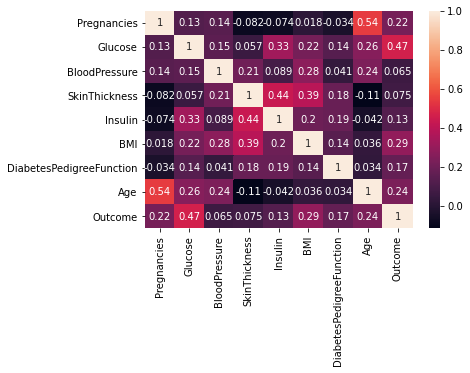

In [ ]:
sns.heatmap(corr,annot=True)

### Visualize the dataset


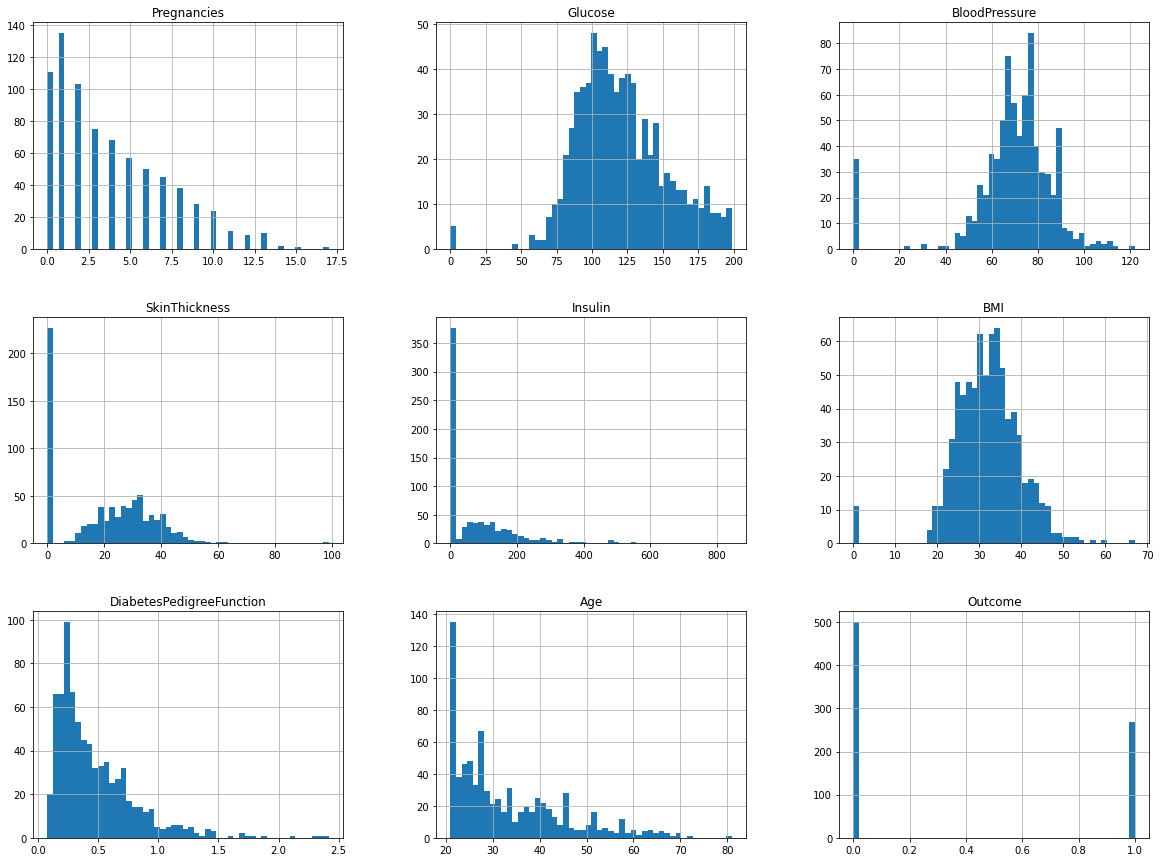

In [ ]:
dataset.hist(bins=50, figsize=(20,15));
plt.show();

### DATA CLEANING (Replace null values by median)

In [ ]:
nonzero_column_array=list(dataset.columns)
for column in nonzero_column_array:
    median=dataset[column].median();
    dataset[column]=dataset[column].replace(to_replace=0, value=median)

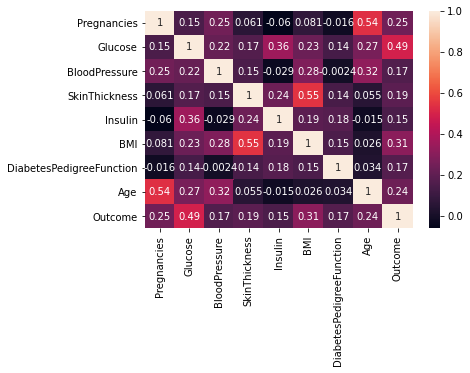

In [ ]:
#dataset.hist(bins=50, figsize=(20,15)); #uncomment if you want see data after cleaning
#plt.show();
corr=dataset.corr();
sns.heatmap(corr,annot=True)

### Split the training dataset in 80% / 20%

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(dataset,test_size=0.20,random_state=0)

### Separate labels from rest of dataset i.e. Final column

In [ ]:
train_set_labels=train_set["Outcome"].copy()
train_set=train_set.drop("Outcome", axis=1)

test_set_labels=test_set["Outcome"].copy()
test_set=test_set.drop("Outcome",axis=1);

In [ ]:
train_set.shape

(614, 8)

In [ ]:
test_set.shape

(154, 8)

### Import and train Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB();
classifier.fit(train_set,train_set_labels);

### Predict

In [ ]:
Predict=classifier.predict(test_set);
len(Predict)

154

### Confusion Matrix

In [ ]:
cm=confusion_matrix(test_set_labels,Predict)
print(cm)


[[92 15]
 [18 29]]


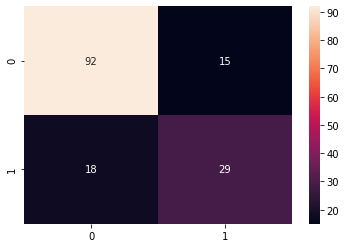

In [ ]:
sns.heatmap(cm,annot=True)

### Accuracy

In [ ]:
accuracy=accuracy_score(test_set_labels,Predict)
print(accuracy)

0.7857142857142857


In [ ]:
testlen=len(test_set_labels)
correctCount=0;
for i in range(154):
    if(Predict[i]==test_set_labels.iloc[i]):
        correctCount+=1;
print("Correct Count",correctCount)

print("Accuracy  : ",correctCount/testlen)

Correct Count 121
Accuracy  :  0.7857142857142857
